# Problem descriptions
I. User level:
Run-time - p.cpu_times()

II. Sytem level:
1. CPU usage (p.cpu_percent())
2. Memory usage (p.memory_percent())
3. Hard drive usage
4. RSS: Resident set size: This is non-swapped physical memory that a process had used
5. VMS: Virtual memory size: This is the total virtual memory used by the process
6. Number of page faults


Some key terms:

- **rss**: aka “Resident Set Size”, this is the non-swapped physical memory a process has used. On UNIX it matches “top“‘s RES column). On Windows this is an alias for wset field and it matches “Mem Usage” column of taskmgr.exe.
- **vms**: aka “Virtual Memory Size”, this is the total amount of virtual memory used by the process. On UNIX it matches “top“‘s VIRT column. On Windows this is an alias for pagefile field and it matches “Mem Usage” “VM Size” column of taskmgr.exe.
- **shared**: (Linux) memory that could be potentially shared with other processes. This matches “top“‘s SHR column).
- **text** (Linux, BSD): aka TRS (text resident set) the amount of memory devoted to executable code. This matches “top“‘s CODE column).
- **data** (Linux, BSD): aka DRS (data resident set) the amount of physical memory devoted to other than executable code. It matches “top“‘s DATA column).
- **lib** (Linux): the memory used by shared libraries.
- **dirty** (Linux): the number of dirty pages.
- **pfaults** (macOS): number of page faults.
- **pageins** (macOS): number of actual pageins.

# Instructions

## Installations
1. Install R if it is not available
2. Install scagnostics for R:
- Run R
- Run this command: install.packages("scagnostics")
3. Install psutil for Python by running this command: pip install plutil
4. Install keras if it is not available: pip install eras

## Run the programs individually
1. Run scagnostics version
- Go to the code project folder
- Go to scag folder
- Run this command: sudo python scag.py
- Read the csv file (with scag + time_stamp + .csv) for the result
- Note: sudo is needed only if we use fs_usage option for tracking the disk usage. Also, if we do use fs_usage then the output result is saved in (scag-fs_usage + time_stamp + .csv) file.
2. Run CNN version
- Go to the code project folder
- Go to cnn folder
- Run this command: sudo python cnn.py
- Read the csv file (with cnn + time_stamp + .csv) for the result
- Note: sudo is needed only if we use fs_usage option for tracking the disk usage. Also, if we do use fs_usage then the output result is saved in (cnn-fs_usage + time_stamp + .csv) file.

## Run the programs together
For simpler way but might be less accurate (see below). This is a more critical way (but it would not be practical if we need to use fs_usage for tracking the disk usage due to the sudo requirement):
- First, change the relative paths to the data files (from both scag.py and cnn.py) and trained model file (from cnn.py) to absolute paths.
- Second, run this command (Linux and macOS only): crontab -e
- Third, add following lines to crontab, so they will be executed in coming 12:30 (hour:minute):
<code>
30 12 * * * python path_to_project1/cnn/cnn.py
30 12 * * * python path_to_project1/scag/scag.py
</code>
- Forth, wait for the executions to be done (about 30 minutes), 

Note: 
- Remember to remove these lines from crontab (otherwise they will be executed everyday).

For a simpler way just open two terminals do the step 1 and step 2 (leave the python cnn.py and python scag.py at the terminals). Then once ready run one command, then switch quickly to another one to run another command.

## Result analysis
The file AnalyzeResults.ipynb is used to analyze the data.
Please change the path to the resulted CSV files accordingly (e.g., since each time we run it create a new data file with the run timestamp). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import multiprocessing
cpu_count = multiprocessing.cpu_count()

In [3]:
cpu_count

12

In [4]:
# read individual scag data
scag = pd.read_csv('./scag/scag-1585527942.csv')
cnn = pd.read_csv('./cnn/cnn-1585527237.csv')
scag_both = pd.read_csv('./scag/scag-1585528752.csv')
cnn_both = pd.read_csv('./cnn/cnn-1585528304.csv')

In [5]:
scag.rename(columns={"Unnamed: 0": "run_number"}, inplace=True)
cnn.rename(columns={"Unnamed: 0": "run_number"}, inplace=True)
scag_both.rename(columns={"Unnamed: 0": "run_number"}, inplace=True)
cnn_both.rename(columns={"Unnamed: 0": "run_number"}, inplace=True)

In [6]:
scag['total_runtime'] = scag['cpu_times_user'].values + scag['cpu_times_system'].values
cnn['total_runtime'] = cnn['cpu_times_user'].values + cnn['cpu_times_system'].values
scag_both['total_runtime'] = scag_both['cpu_times_user'].values + scag_both['cpu_times_system'].values
cnn_both['total_runtime'] = cnn_both['cpu_times_user'].values + cnn_both['cpu_times_system'].values

In [7]:
scag.head()

,run_number,cpu_percent,cpu_times_user,cpu_times_system,cpu_times_children_user,cpu_times_children_system,memory_percent,disk_usage_total,disk_usage_used,disk_usage_free,memory_full_info_rss,memory_full_info_vms,memory_full_info_pfaults,memory_full_info_pageins,memory_full_info_uss,time_period,total_runtime
0,0,0.0,27.153603,0.895841,0.0,0.0,4.472041,4.999632e+11,3.599859e+11,1.269660e+11,768290816.0,7.585448e+09,255293.0,0.0,735330304.0,1.980762e+10,28.049444
1,1,100.5,46.163296,1.366466,0.0,0.0,4.476428,4.999632e+11,3.599859e+11,1.269659e+11,769044480.0,7.587545e+09,260459.0,0.0,711061504.0,3.919076e+10,47.529762
2,2,100.4,65.074725,1.830442,0.0,0.0,4.446197,4.999632e+11,3.599859e+11,1.269659e+11,763850752.0,7.587545e+09,262244.0,0.0,698322944.0,5.847977e+10,66.905167
3,3,100.5,84.152345,2.295831,0.0,0.0,4.477763,4.999632e+11,3.599860e+11,1.269659e+11,769273856.0,7.587545e+09,263884.0,0.0,697643008.0,7.793449e+10,86.448176
4,4,100.5,103.368139,2.761850,0.0,0.0,4.509783,4.999632e+11,3.599860e+11,1.269658e+11,774774784.0,7.587545e+09,265724.0,0.0,702918656.0,9.752358e+10,106.129989


In [8]:
def plot_scatter(column_name, xlabel, ylabel):
    plt.scatter(np.arange(len(scag)), scag[column_name],  edgecolors='black', facecolors='none', label='scag')
    plt.scatter(np.arange(len(cnn)), cnn[column_name], edgecolors='red', facecolors='none', label='cnn')
    plt.scatter(np.arange(len(scag_both)), scag_both[column_name], c='black', marker='x', label='scag (both)')
    plt.scatter(np.arange(len(cnn_both)), cnn_both[column_name], c='red', marker='x', label='cnn (both)')
    plt.legend()
    plt.xlabel(xlabel, fontdict={"size": 14})
    plt.ylabel(ylabel, fontdict={"size": 14})
    plt.tight_layout()
    plt.show()

# I. User level
Task 1: Run time

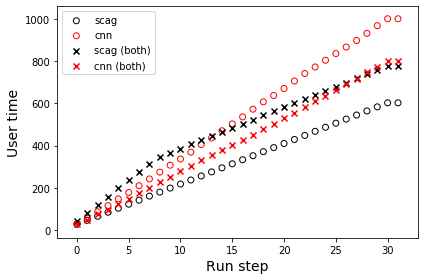

In [9]:
plot_scatter('cpu_times_user', "Run step", "User time")

It is observable that CPU user time for CNN approach is higher than that for Scag approach in both situations (running individually and running two programs together). However, this is the accumulative time for all CPUs and by default CNN approach uses multi processors (12 in this case).

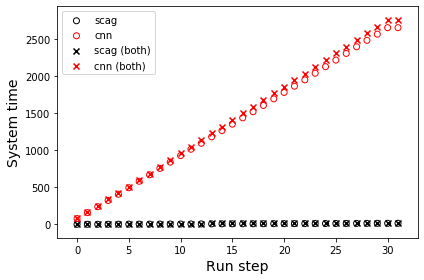

In [10]:
plot_scatter('cpu_times_system', "Run step", "System time")

It is observable that system time for CNN in both case are also a lots higher. However, again that these are the accumulative times for all CPUs.

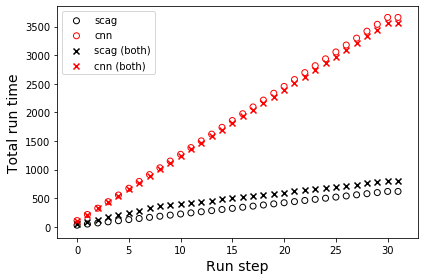

In [11]:
plot_scatter('total_runtime', "Run step", "Total run time")

Total runtime (user and system time) for CNN also higher for both cases.

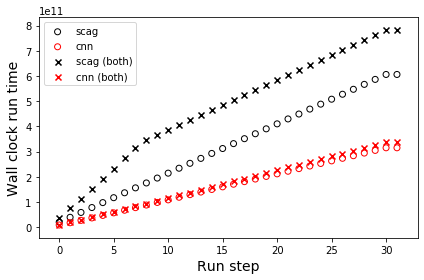

In [12]:
plot_scatter('time_period', "Run step", "Wall clock run time")

However, as wall clock time (the unit is in nano second), run time for CNN in both situations (in red) are better than for scagnostics. Though the system time and the user time are higher. Due to multiprocessing, these time are divided into different CPUs therefore, the final resulted runtime is better.

# II. System level
## Task 1. CPU Usage

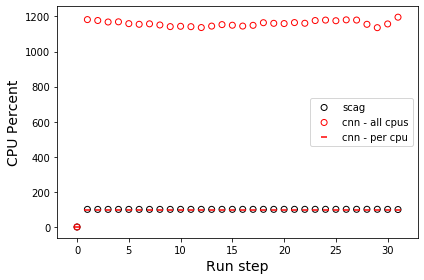

In [13]:
plt.scatter(np.arange(len(scag)), scag.cpu_percent, edgecolors='black', facecolors='none',  label = 'scag')
plt.scatter(np.arange(len(cnn)), cnn.cpu_percent, edgecolors='red', facecolors='none', label = 'cnn - all cpus')
plt.scatter(np.arange(len(cnn)), cnn.cpu_percent/cpu_count, c='red', marker='_', label = 'cnn - per cpu')
plt.legend()
plt.xlabel("Run step", fontdict={"size": 14})
plt.ylabel("CPU Percent", fontdict={"size": 14})
plt.tight_layout()
plt.show()

For the first run step the CPU percentage for all cases are low. However, it gets very high for the next steps due to the use of loop in our program to run the same algorithm for 31 times. It is noticable that CPU percent for CNN even gets up to 1200%. This is due to the use of 12 cores. Therefore, once we divide this into 12 (as shown in with the <font color=red>-</font> mark), the percentage per CPU gets close to 100% as in case for scagnostics.

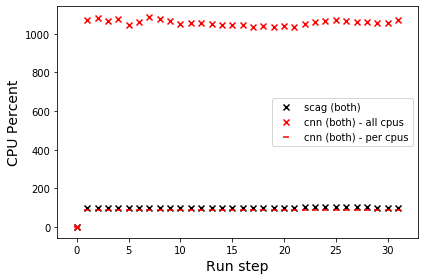

In [14]:
plt.scatter(np.arange(len(scag_both)), scag_both.cpu_percent, c='black', marker='x', label='scag (both)')
plt.scatter(np.arange(len(cnn_both)), cnn_both.cpu_percent, c='red', marker='x', label='cnn (both) - all cpus')
plt.scatter(np.arange(len(cnn_both)), cnn_both.cpu_percent/cpu_count, c='red', marker='_', label='cnn (both) - per cpus')
plt.legend()
plt.xlabel("Run step", fontdict={"size": 14})
plt.ylabel("CPU Percent", fontdict={"size": 14})
plt.tight_layout()
plt.show()

When running both programs together, the CPU percentages are similar to the previous cases. However, the CPU percentage for scag is slightly lower than the previous situation (1,200 something vs. 1,100 something) since there is part of the CPUs now dedicated to running scagnosttics.

## Task 2. Memory usage (p.memory_percent())

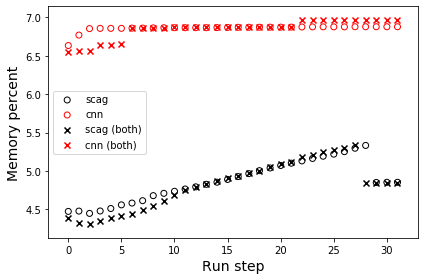

In [15]:
plot_scatter('memory_percent', 'Run step', 'Memory percent')

In both cases, CNN uses more memory than sscagnostics algorithms.

## Task 3. Hard drive usage

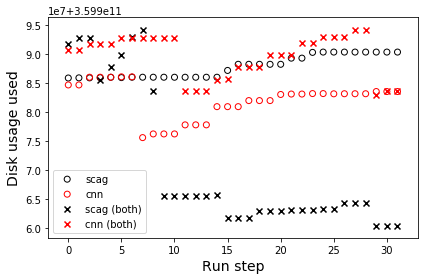

In [16]:
plot_scatter('disk_usage_used', 'Run step', 'Disk usage used')

This is the information about hard disk usage (size of the hard disk used in the computer, not specific to any process) monitored during running the program. Due to macOS permission we cannot use commands to collect disk I/O count (except if we do the rootl by rebooting and changing the OS configuration, but this option makes the computer less secure). Therefore, we use fs_usage to monitor the program access to file systems. Another note is that the fs_usage command cannot be executed in parallel (in case of running two programs together), so I only report the file system access for each of the program when they run individually. Furthermore, I do not monitor the program at the initial stage (loading input files or other overheads), but only monitor when using the algorithm for the loaded input data.

In [17]:
with open('cnn/cnn-fs_usage-1585523610.txt') as f:
    lines = f.readlines()
print(len(lines))

0


One notice is that when running fs_command to monitor the CNN version of the program, it does not do any file system access (no lines written in the fs_usage output file for CNN case).

In [18]:
with open('scag/scag-fs_usage-1585523215.txt') as f:
    lines = f.readlines()
print(len(lines))

493


There are 493 file system usage lines. The next few blocks of codes we will give the break-down of the file system commands that Scagnostics algorithm uses.

In [19]:
# process each output of the fs_usage
def process_fs_usage_line(line):
    return line.replace("b'", "").replace("\\n'\n", "").strip().split()
fs_usage_lines = [process_fs_usage_line(line) for line in lines]

In [20]:
# the command
fs_commands = [l[1] for l in fs_usage_lines]

In [21]:
from collections import Counter
command_counter = Counter(fs_commands)

In [22]:
command_counter

Counter({'openat': 1,
         'open': 9,
         'fstatfs64': 3,
         'getdirentries64': 5,
         'close': 9,
         'stat64': 4,
         'mmap': 2,
         'fstat64': 7,
         'read': 175,
         'PAGE_IN_FILE': 25,
         'lseek': 175,
         'fcntl': 1,
         'RdData[A]': 77})

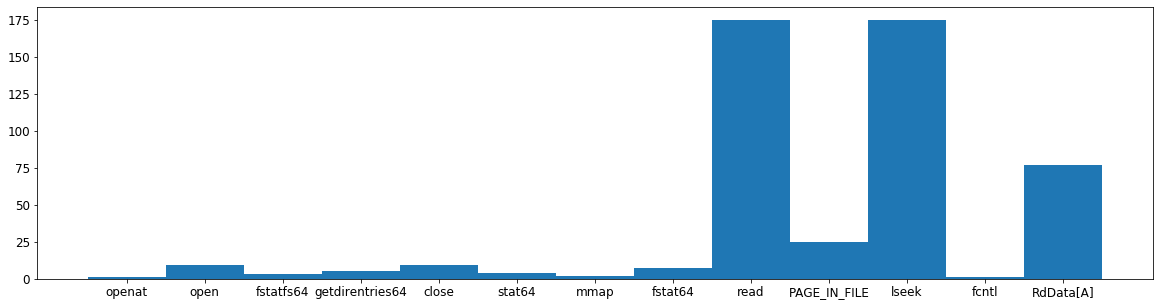

In [23]:
plt.figure(figsize=(20, 5))
labels, values = zip(*command_counter.items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

It is observable that most of the file system usage is about read (read), and or seeking for some location in a file (lseek).

## Task 4. RSS: Resident set size
This is non-swapped physical memory that a process had used


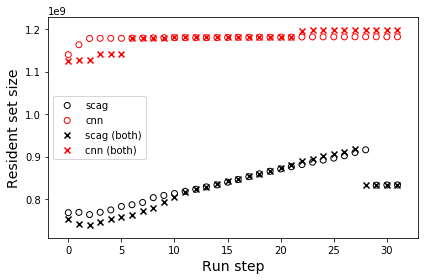

In [24]:
plot_scatter('memory_full_info_rss', 'Run step', 'Resident set size')

In both cases, CNN uses more resident set size memory than scagnostics.

## Task 5. VMS: Virtual memory size
This is the total virtual memory used by the process

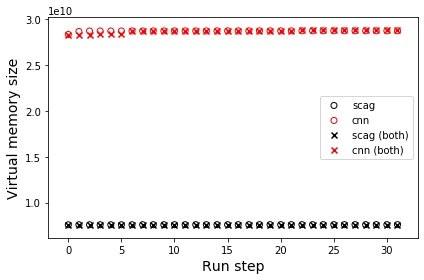

In [25]:
plot_scatter('memory_full_info_vms', 'Run step', 'Virtual memory size')

Similarly, in both cases, CNN uses more virtual memory size than scagnostics.

## Task 6. Number of page faults

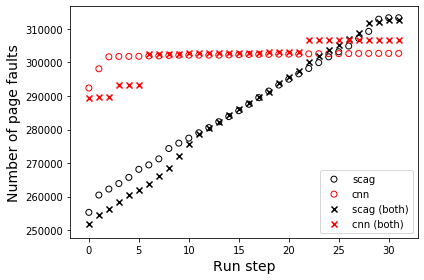

In [26]:
plot_scatter('memory_full_info_pfaults', 'Run step', 'Number of page faults')

It is noticable that number of page faults when using scagnostics algorithm increases gradually after each execution loop (in both running conditions). In case of CNN, there are more pagefaults, but it seems more stable in case running individually, and increases slowly when running together with scagnostics.